In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the bookingd the booking

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [9]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [10]:
df.flight_day.unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [13]:
df.trip_type.value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [20]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [24]:
# Assuming df is your DataFrame
le = LabelEncoder()

# Fit and transform the trip_type column
df['trip_type_encoded'] = le.fit_transform(df['trip_type'])

# Drop the old trip_type column
df.drop('trip_type', axis=1, inplace=True)

In [26]:
day_mapping = {
    'Sun': 0,
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6
}

# Assuming df['day'] contains the days of the week
df['flight_day_encoded'] = df['flight_day'].map(day_mapping)

# Drop the old day column
df.drop('flight_day', axis=1, inplace=True)

In [28]:
df.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_encoded,flight_day_encoded
0,2,Internet,262,19,7,AKLDEL,New Zealand,1,0,0,5.52,0,2,6
1,1,Internet,112,20,3,AKLDEL,New Zealand,0,0,0,5.52,0,2,6
2,2,Internet,243,22,17,AKLDEL,India,1,1,0,5.52,0,2,3
3,1,Internet,96,31,4,AKLDEL,New Zealand,0,0,1,5.52,0,2,6
4,2,Internet,68,22,15,AKLDEL,India,1,0,1,5.52,0,2,3


In [30]:
x = df[['num_passengers','trip_type_encoded','purchase_lead','length_of_stay','flight_hour','flight_day_encoded','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration']]
y = df['booking_complete']

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)  

In [34]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [38]:
print(x_train_resampled.shape)
print(y_train_resampled.shape)

(63748, 10)
(63748,)


In [40]:
scaler = StandardScaler()    
x_train_resampled= scaler.fit_transform(x_train_resampled)    
x_test= scaler.transform(x_test) 

# Random Forest

In [43]:
clf = RandomForestClassifier()
clf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [44]:
clf.score(x_train_resampled, y_train_resampled)

0.9996235176005521

In [45]:
clf.feature_importances_

array([0.0328713 , 0.00267334, 0.22583246, 0.13161109, 0.14343914,
       0.08353921, 0.01873758, 0.0140665 , 0.01833395, 0.32889542])

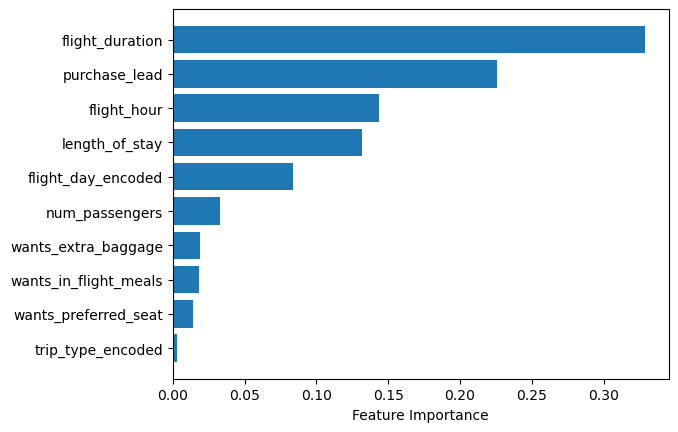

In [46]:
sort = clf.feature_importances_.argsort()
plt.barh(x.columns[sort], clf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.savefig('feature-importance-bar.png', dpi=300, bbox_inches='tight')

In [47]:
y_pred = clf.predict(x_test)

In [48]:
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(mae)
print(accuracy)

0.20896
0.79104


In [49]:
cm= confusion_matrix(y_test, y_pred) 

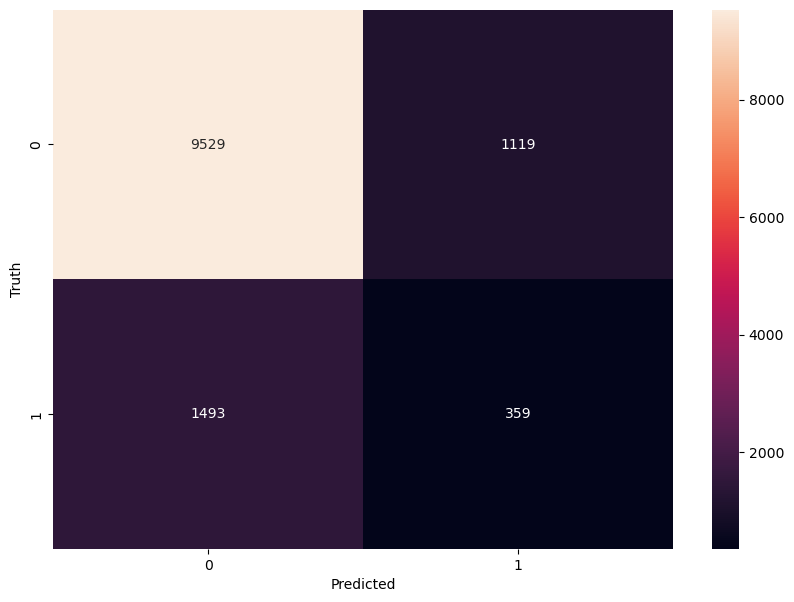

In [50]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, fmt="d",annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusion-matrix.png')

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     10648
           1       0.24      0.19      0.22      1852

    accuracy                           0.79     12500
   macro avg       0.55      0.54      0.55     12500
weighted avg       0.77      0.79      0.78     12500



# Linear SVM

In [53]:
linear = LinearSVC(C=1,dual=False, max_iter=5000)
linear.fit(x_train_resampled, y_train_resampled)
linear_pred = linear.predict(x_test)

In [54]:
linear.score(x_train_resampled, y_train_resampled)

0.6119407667691535

In [55]:
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_accuracy = accuracy_score(y_test, linear_pred)

print(linear_mae)
print(linear_accuracy)

0.44128
0.55872


In [56]:
cm= confusion_matrix(y_test, linear_pred) 

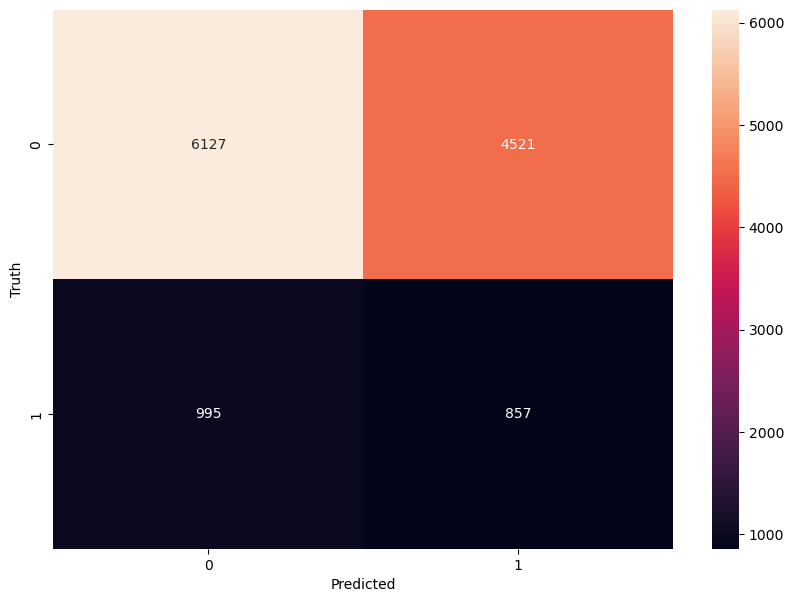

In [57]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, fmt="d",annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusion-matrix.png')

In [58]:
print(classification_report(y_test, linear_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69     10648
           1       0.16      0.46      0.24      1852

    accuracy                           0.56     12500
   macro avg       0.51      0.52      0.46     12500
weighted avg       0.76      0.56      0.62     12500



# Gradient Boosting

In [60]:
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(x_train_resampled, y_train_resampled)
y_pred_gb = gb_clf.predict(x_test)

In [61]:
gb_clf.score(x_train_resampled, y_train_resampled)

0.8026761623894083

In [62]:
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_accuracy = accuracy_score(y_test, y_pred_gb)

print(gb_mae)
print(gb_accuracy)

0.21784
0.78216


In [63]:
cm= confusion_matrix(y_test, y_pred_gb) 

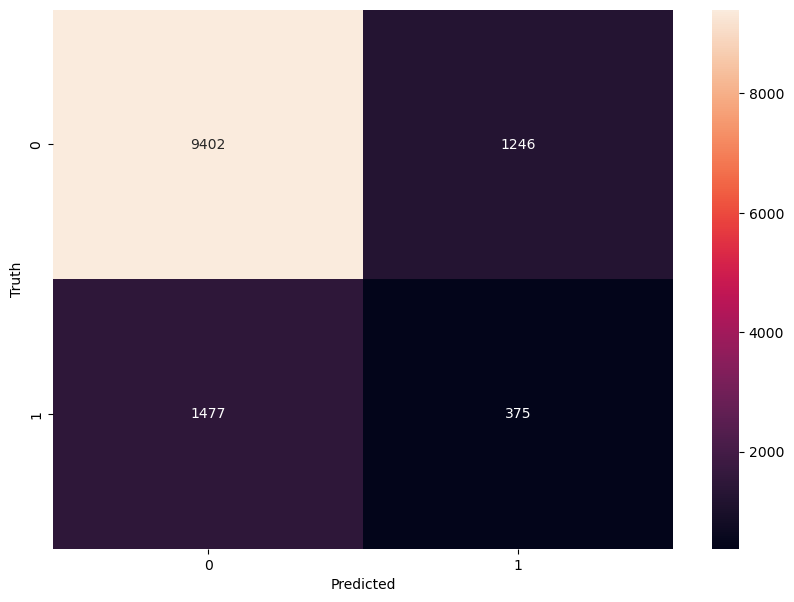

In [64]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, fmt="d",annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusion-matrix.png')

In [65]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     10648
           1       0.23      0.20      0.22      1852

    accuracy                           0.78     12500
   macro avg       0.55      0.54      0.54     12500
weighted avg       0.77      0.78      0.78     12500



# XGBoost

In [67]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train_resampled, y_train_resampled)
xgb_pred = xgb.predict(x_test)

In [68]:
xgb.score(x_train_resampled, y_train_resampled)

0.8516659346175566

In [69]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(xgb_mae)
print(xgb_accuracy)

0.20248
0.79752


In [70]:
cm= confusion_matrix(y_test, xgb_pred) 

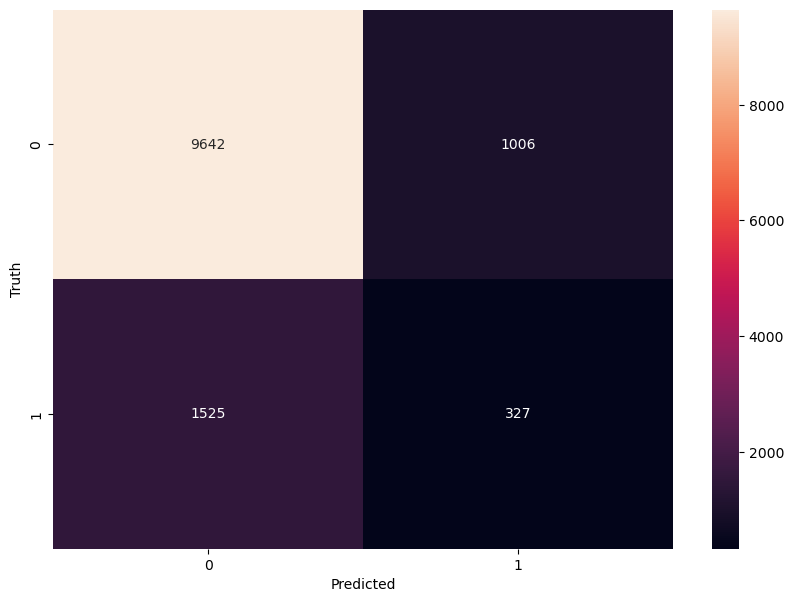

In [71]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, fmt="d",annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusion-matrix.png')

In [72]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     10648
           1       0.25      0.18      0.21      1852

    accuracy                           0.80     12500
   macro avg       0.55      0.54      0.54     12500
weighted avg       0.77      0.80      0.78     12500



# Radial SVM

In [ ]:
rbf = SVC(kernel='rbf', class_weight='balanced')
rbf.fit(x_train_resampled, y_train_resampled)
rbf_pred = rbf.predict(x_test)

In [ ]:
rbf.score(x_train_resampled, y_train_resampled)

In [ ]:
rbf_mae = mean_absolute_error(y_test, rbf_pred)
rbf_accuracy = accuracy_score(y_test, rbf_pred)

print(rbf_mae)
print(rbf_accuracy)

In [ ]:
cm= confusion_matrix(y_test, rbf_pred) 

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, fmt="d",annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusion-matrix.png')

In [ ]:
print(classification_report(y_test, rbf_pred))

# LightGBM

In [80]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(class_weight='balanced')
lgb.fit(x_train_resampled, y_train_resampled)
lgb_pred = lgb.predict(x_test)

[LightGBM] [Info] Number of positive: 31874, number of negative: 31874
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 63748, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [81]:
lgb.score(x_train_resampled, y_train_resampled)

0.8368576269059421

In [82]:
lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_accuracy = accuracy_score(y_test, lgb_pred)

print(lgb_mae)
print(lgb_accuracy)

0.1736
0.8264


In [83]:
cm= confusion_matrix(y_test, lgb_pred) 

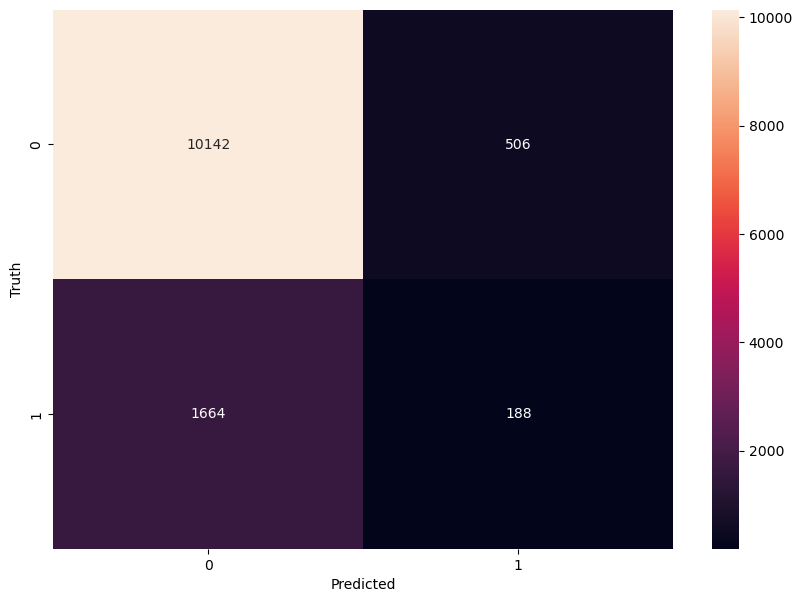

In [84]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, fmt="d",annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusion-matrix.png')

In [85]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     10648
           1       0.27      0.10      0.15      1852

    accuracy                           0.83     12500
   macro avg       0.56      0.53      0.53     12500
weighted avg       0.77      0.83      0.79     12500



# Hyperparameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
RFclf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(RFclf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)
print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_*100))

Best parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 86.52%


In [98]:
rf_model = RandomForestClassifier(
    max_depth=None,          
    min_samples_split=2,    
    n_estimators=100,        
    random_state=42          
)

rf_model.fit(x_train_resampled, y_train_resampled)
rf_pred = rf_model.predict(x_test)

In [99]:
rf_model.score(x_train_resampled, y_train_resampled)

0.9996078308339085

In [102]:
final_mae = mean_absolute_error(y_test, rf_pred)
final_accuracy = accuracy_score(y_test, rf_pred)

print(final_mae)
print(final_accuracy)

0.20816
0.79184


In [104]:
cm= confusion_matrix(y_test, rf_pred) 